<a name="top" id="top"></a>

<div align="center">

<h1>PSO 2: Response of First and Second order systems to sinusoidal inputs

</h1>

<p>
  <a href="https://github.com/bernalde"><strong>David E. Bernal Neira</strong></a><br>
  <em>Davidson School of Chemical Engineering, Purdue University</em><br>
  <em>Universities Space Research Association</em><br>
  <em>NASA QuAIL</em>
</p>

<br>

<p>
  <a href="https://github.com/mhuertasm"><strong>Mateo Huertas Marulanda</strong></a><br>
  <em>Chemical Engineering, National University of Colombia</em><br>
  <em>Undergraduate Visiting Scholar</em>
</p>

<br>

<p>
  <a href="https://colab.research.google.com" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
  </a>
  <a href="https://secquoia.github.io/">
    <img src="https://img.shields.io/badge/🌲⚛️🌐-SECQUOIA-blue" alt="SECQUOIA">
  </a>
</p>

</div>

## 🎯 Objective
Analyze the forced response of a first-order system when subjected to a sinusoidal input, and observe how the system attenuates and phase-shifts the signal depending on input frequency.

## 💻 Code Purpose
This script simulates how a first-order system with transfer function $H(s) =\frac {1} {(s + 1)}$ responds to a sine wave input. It helps demonstrate frequency-domain behavior in the time domain.

## 🔑 Key Functions
- `control.forced_response()`: Computes the response of the system to an arbitrary input.
- `numpy.sin()`: Generates the sine wave used as input.


In [7]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt



# Define transfer function

In [8]:

num = [1]  # Numerator coefficients of the transfer function (G(s) = 1 / (s + 1))
den = [1, 1]  # Denominator coefficients of the transfer function (first-order system)
system = ct.TransferFunction(num, den)  # Define the transfer function system G(s) = 1 / (s + 1)


# Define the sine wave input and the time vector

In [9]:
# Simulation parameters
fs = 100      # Sampling frequency in Hz
T = 2         # Total simulation time in seconds
t = np.linspace(0, T, fs * T)  # Time vector 
# Define the input: a sine wave of 1.5 Hz
f_input = 1.5  # Frequency of sine wave in Hz
input_signal = np.sin(2 * np.pi * f_input * t)  # Unit amplitude sine wave



# Compute the system's forced response to the sine wave

In [10]:
response = ct.forced_response(system, T=t, U=input_signal)  #Compute the time response of the system to a custom input signal over time vector t


# Plot the system response

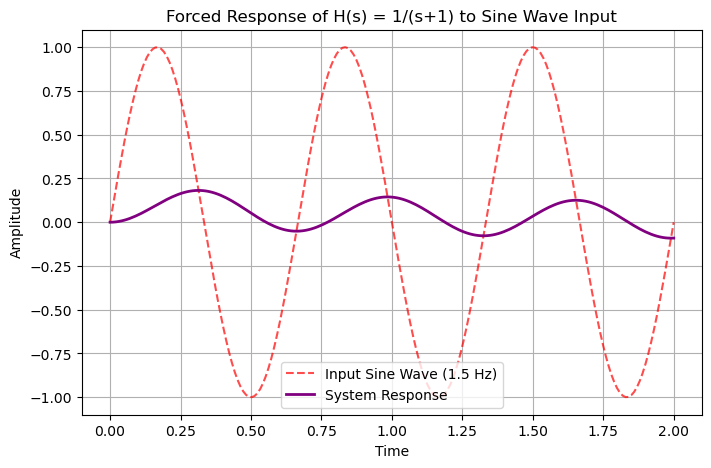

In [11]:

# Plot input and output
plt.figure(figsize=(8, 5))

# Plot the input sine wave
plt.plot(t, input_signal, '--', label="Input Sine Wave (1.5 Hz)", alpha=0.7, color='r')

# Plot the system's output
plt.plot(response.time, response.outputs, label="System Response", linewidth=2, color="purple")

# Add labels and legend
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Forced Response of H(s) = 1/(s+1) to Sine Wave Input")
plt.legend()
plt.grid(True)
plt.show()

---

## Conclusions 📌📊🧠

- The **input signal** is a 1.5 Hz sine wave, used to test the system's dynamic response.

- The **system response** shows clear attenuation of the input amplitude, consistent with the expected behavior of a first-order system.

- There is a visible **delay (phase shift)** between the input and the system’s response.

- This behavior is typical of **first-order systems**, which respond more slowly to higher-frequency inputs.

The analysis shows how systems filter signals depending on their frequency, **which is essential for predicting and designing control system responses**.


---


###  Individual Exercise

**Analyze the time response of the second-order system given below to a sinusoidal input signal.**

Show that:
- If the frequency of the input signal equals the natural frequency of the system, the system becomes **unstable**.
- For frequencies **smaller or larger** than the natural frequency, the system is **stable**.
- At frequencies **close to** the natural frequency, the system is still stable but exhibits **oscillations with amplified amplitude**.

The transfer function of the system is:

$
G(s) = \frac{1}{s^2 + 1}
$

### Create a Time Vector
Define a time vector long enough to observe long-term behavior (especially important for identifying resonance). Use np.linspace() to create 5000 time steps from 0 to 300 seconds.

### Define the System
Use the control library to define the transfer function 
$
G(s) = \frac{1}{s^2 + 1}
$


### Define three sinusoidal input signals with different frequencies:

Define three input signals using NumPy’s `sin()` function and the time vector `t`:
- `u1 = np.sin(omega1 * t)` for $\omega = 0.5$ (**stable**)
- `u2 = np.sin(omega2 * t)` for $\omega = 1.0$ (**unstable**)
- `u3 = np.sin(omega3 * t)` for $\omega = 1.5$ (**stable / amplified**)


### Simulate the System Response
Use ct.forced_response() to simulate the output of the system when subject to each sinusoidal input. This will return the system’s output for each case.

### Plot the Responses